In [4]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import operator as op
import matplotlib.pyplot as plt
import math
import time
from Utils99 import *
from CLOUD import *
from TEDA import *
from RLS_VDF import *
from RLS_LOG import *
from RLS_EXP import *
from Utils_graph import *
import optuna
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_pareto_front
from optuna.importance import get_param_importances
import sys
#from TedaGraphs import *
from TedaGraphs2 import *

def brng_params(brng):
    if brng == 'Bearing1_1.csv': Mp = [5, 18, 1.4476094320666959e-05, 2.4994589695113715e-05, 0.000113021531828127, 10, 1.26, 0.99, 0.1203]
    if brng == 'Bearing1_2.csv': Mp = [5, 18, 0.0011587259603807196, 0.00022711225579341771, 0.0005003578521059077, 7, 1.34, 0.98, 0.1203]
    if brng == 'Bearing1_3.csv': Mp = [5, 18, 0.00029985760409049995, 3.251063081814307e-05, 0.0001230888199580327, 12, 1.34, 0.96, 0.1203]
    if brng == 'Bearing1_5.csv': Mp = [5, 18, 3.0253615202546654e-05, 0.0005242932456032549, 1.6843615336830875e-05, 5, 1.3699999999999999, 0.95, 0.1692]
    if brng == 'Bearing2_2.csv': Mp = [5, 24, 0.0006826086663470173, 4.040452823742237e-05, 0.0007316593705663688, 18, 1.3599999999999999, 0.96, 0.1203]
    if brng == 'Bearing2_4.csv': Mp = [5, 15, 0.004268234559619661, 0.0002719800427134719, 0.0014263483063038727, 23, 1.3, 0.99, 0.0843]
    return Mp

def cm(x):
    return x/2.54

out = 'IMAGENS/'
#names = ['Bearing1_1','Bearing1_2','Bearing1_3','Bearing2_2','Bearing2_4']
#bearings = ['Bearing1_1.csv','Bearing1_2.csv','Bearing1_3.csv','Bearing2_2.csv','Bearing2_4.csv']
#bearings_id = ['a) Bearing1_1','b) Bearing1_2','c) Bearing1_3','d) Bearing2_2','e) Bearing2_4']

names = ['Bearing1_1','Bearing1_5','Bearing2_4']
bearings = ['Bearing1_1.csv','Bearing1_2.csv','Bearing1_3.csv','Bearing2_2.csv','Bearing2_4.csv']
bearings_id = ['R1_1','R1_2','R1_3','R2_2','R2_4']

In [2]:
'''class TEDARegressor:
  def __init__(self,nI,nR,nO,N1,N2,N3,tau,m,eol,fator=1,ep=0.1,wta=False):

    self.g = 1
    self.gCreated = 1
    self.c= np.array([DataCloud(self.gCreated,nI,nR,nO,N1,N2,N3,tau,x=0)],dtype=DataCloud)
    self.alfa= np.array([0.0],dtype=float)
    self.intersection = np.zeros((1,1),dtype=int)
    self.listIntersection = np.zeros((1),dtype=int)
    self.matrixIntersection = np.zeros((1,1),dtype=int)
    self.relevanceList = np.zeros((1),dtype=int)
    self.k=1
    self.m = m
    self.nI = nI
    self.nR = nR
    self.nO = nO
    self.N1 = N1
    self.N2 = N2
    self.N3 = N3
    self.tau = tau
    self.eol = eol
    self.eolX = 0
    self.fator = fator
    self.classIndex = [[1.0],[1.0]]
    self.argMax = []
    self.NumberOfDataClouds = []
    self.cloud_activation = []
    self.cloud_activation2 = []
    self.HI = np.array([])
    self.DSI = np.array([])
    self.eolDSI = 0
    self.HIp = np.array([])
    self.cycleP=np.array([])
    self.rulL = np.array([])
    self.rulP = np.array([])
    self.rulU = np.array([])
    self.rulR = None
    self.TL = False
    self.ep = ep
    self.order = 3
    self.ff = 1
    self.df =1
    self.dt=1
    self.rls = RLS_LogarithmicRegressor(0.9,10000)
    #self.rls = RLS_ExponentialRegressor(0.9,10000)
    self.vec = np.array([])
    self.win_all = wta

  def mergeClouds(self):
    i=0
    while(i<len(self.listIntersection)-1):
      merge = False
      j=i+1
      while(j<len(self.listIntersection)):
        if(self.listIntersection[i] == 1 and self.listIntersection[j] == 1):
          self.matrixIntersection[i,j] = self.matrixIntersection[i,j] + 1;
        nI = self.c[i].n
        nJ = self.c[j].n
        meanI = self.c[i].mean
        meanJ = self.c[j].mean
        meantI = self.c[i].meant
        meantJ = self.c[j].meant
        varianceI = self.c[i].variance
        varianceJ = self.c[j].variance
        tipicalityI = self.c[i].tipicality
        tipicalityJ = self.c[j].tipicality
        winI=self.c[i].rnn.w_in
        winJ=self.c[j].rnn.w_in
        wrecI=self.c[i].rnn.w_rec
        wrecJ=self.c[j].rnn.w_rec
        woutI=self.c[i].rnn.w_out
        woutJ=self.c[j].rnn.w_out
        hiI=self.c[i].rnn.hI
        hiJ=self.c[j].rnn.hI
        nIntersc = self.matrixIntersection[i,j]    
        idI = self.c[i].ID
        idJ = self.c[j].ID

        # Check if the intersection value is greater than the difference between n and intersection.
        if(nIntersc > (nI - nIntersc) or nIntersc > (nJ - nIntersc)):
            #print('o merge é possível')
            #print(f'fundiu {idI} com {idJ}')
            #print(f'ni: {nI} nj: {nJ}')
            #print('self.matrixIntersection[i,j]  :',self.matrixIntersection[i,j]    )
            merge = True

            # update values for the new cloud
            n = nI + nJ - nIntersc
            mean = ((nI * meanI) + (nJ * meanJ))/(nI + nJ)
            variance = ((nI - 1) * varianceI + (nJ - 1) * varianceJ)/(nI + nJ - 2)
            meant = ((nI * meantI) + (nJ * meantJ))/(nI + nJ)
            #tipicality = sys.float_info.epsilon
            tipicality = ((nI*tipicalityI)+(nJ*tipicalityJ))/(nI + nJ)
            w_in = ((winI*tipicalityI)+(winJ*tipicalityJ))/(tipicalityI+tipicalityJ)
            w_rec = ((wrecI*tipicalityI)+(wrecJ*tipicalityJ))/(tipicalityI+tipicalityJ)
            w_out = ((woutI*tipicalityI)+(woutJ*tipicalityJ))/(tipicalityI+tipicalityJ)
            hI = ((hiI*tipicalityI)+(hiJ*tipicalityJ))/(tipicalityI+tipicalityJ)

            # create and update new data cloud
            self.gCreated+=1
            newCloud = DataCloud(self.gCreated,self.nI,self.nR,self.nO,self.N1,self.N2,self.N3,self.tau,x=0)
            newCloud.updateDataCloud(n,mean,meant,variance,tipicality)

            # update intersection list and data cloud list
            self.listIntersection = np.concatenate((self.listIntersection[0:i], np.array([1]), self.listIntersection[i+1:j], self.listIntersection[j+1:np.size(self.listIntersection)]), axis=None)
            self.c = np.concatenate((self.c[0:i], np.array([newCloud]), self.c[i+1:j], self.c[j+1:np.size(self.c)]), axis=None)
            self.c[-1].rnn.w_in = w_in
            self.c[-1].rnn.w_rec = w_rec
            self.c[-1].rnn.w_out = w_out
            self.c[-1].rnn.hI = hI
            # update intersection matrix
            M0 = self.matrixIntersection

            # remove rows
            M1 = np.concatenate((M0[0:i, :], np.zeros((1, len(M0))), M0[i+1:j, :], M0[j+1:len(M0), :]))
            # remove columns
            M1 = np.concatenate((M1[:, 0:i], np.zeros((len(M1), 1)), M1[:, i+1:j], M1[:, j+1:len(M0)]), axis=1)
            # calculate new column
            col = (M0[:, i] + M0[:, j]) * (M0[:, i] * M0[:, j] != 0)
            col = np.concatenate((col[0:j], col[j+1:np.size(col)]))
            # calculate new row
            lin = (M0[i, :] + M0[j, :]) * (M0[i, :] * M0[j, :] != 0)
            lin = np.concatenate((lin[0:j], lin[j+1:np.size(lin)]))
            # update column
            M1[:, i] = col
            # update row
            M1[i, :] = lin
            M1[i, i+1:j] = M0[i, i+1:j] + M0[i+1:j, j].T

            self.matrixIntersection = M1
        j += 1
      if (merge):
        i = 0
      else:
        i += 1
  
  def uncertainty(self):
    
    XR = self.rulR
    XP = self.rulP
    for i in range(len(XP)):
        if XP[i] == 0: XP[i]=1e-16
    YR = np.abs(XR-XP)
    for i in range(len(YR)):
        if YR[i] == 0: YR[i]=1e-16

    #rls = RLS_LogarithmicRegressor(ff,dt)
    #rls = RLS_ExponentialRegressor(ff,dt)
    i,YP=0,np.array([])
    if not self.TL:
      for x, y in zip(XP, YR):
        pred = self.rls.predict(x)
        YP = np.append(YP,pred)
        self.rls.update(x, y)
    if self.TL:
      for x, y in zip(XP, YR):
        #print('manteve')
        pred = self.rls.predict(x)
        YP = np.append(YP,pred)

    self.rulU = self.rulP + (self.ep*YP)
    self.rulL = self.rulP - (self.ep*YP)

    for i in range(len(self.rulU)):
       if self.rulL[i] < 0: self.rulL[i] = 0
       if self.rulU[i] < 0: self.rulU[i] = 0
       if self.rulU[i] > np.max(self.rulR): 
          self.rulU[i] = self.rulU[i-1]
          #print('entrou')
       if self.rulL[i] > self.rulP[i]:
          mn = self.rulU[i]
          mx = self.rulL[i]
          self.rulL[i]=mn
          self.rulU[i]=mx

  def predict(self,Xcopy):
    #print('gs:',self.g)
    wSum = sum([cloud.tipicality for cloud in self.c])
    ws = np.array([cloud.tipicality/wSum for cloud in self.c]).reshape(-1,1)
    p = np.array([cloud.rnn.predict(Xcopy) for cloud in self.c])
    #for cloud in self.c:
    #   print(cloud.rnn.ht)
    #for cloud in self.c:
    #   (cloud.rnn.restore())
    #print('p:',p,)
    #print('ws:',ws,p)
    p1 = (p*ws)
    #print('p1:',p,)
    p1 = sum([p1[i][-1] for i in range(len(p))])
    #print('p2:',p,)
    if self.win_all:
       p1 = p[np.argmax(ws)][-1]
    #print(p1)
    return p1
  
  def predict2(self,Xcopy):
    wSum = sum([cloud.tipicality for cloud in self.c])
    ws = np.array([cloud.tipicality/wSum for cloud in self.c]).reshape(-1,1)
    p = np.array([cloud.rnn.predict2(Xcopy) for cloud in self.c])
    p1 = (p*ws)
    p1 = sum([p1[i][-1] for i in range(len(p))])
    if self.win_all:
       p1 = p[np.argmax(ws)][-1]
    return p1
  
  def restore_rnn(self):
     for cloud in self.c:
        cloud.rnn.restore()

  def RUL_single(self,X):
    eP,eL,eU=0,0,0
    pP,pU,pL,rulP,rulU,rulL = [0 for i in range(6)]
    xP,xU_max,xU_min,xL_min,xL_max = [X.copy() for i in range(5)]
    pP = self.predict(xP)*self.fator
    eR = np.abs(self.HI[-1]-pP) 
    self.HIp = np.append(self.HIp,pP)
    vL,vU,vP=[],[],[]

    if pP>0:
      self.rls.update(np.abs(pP), eR)
      eP = self.rls.predict(np.abs(pP))
    
    self.restore_rnn()
    
    while xP[-1]>self.eol:
      pP = self.predict(xP)*self.fator
      #if self.k ==2: print('pP:',pP)
      xP = np.delete(np.append(xP,pP),0)
      rulP=rulP+1
      if rulP ==80: break
      vP.append(pP)
    self.restore_rnn()

    self.rulP = np.append(self.rulP,rulP)
    self.rulL = np.append(self.rulL,rulL)
    self.rulU = np.append(self.rulU,rulU)


    return
  
  def RUL_uncertainty(self,X):

    eP,eL,eU=0,0,0
    pP,pU,pL,rulP,rulU,rulL = [0 for i in range(6)]
    xP,xU_max,xU_min,xL_min,xL_max = [X.copy() for i in range(5)]
    pP = self.predict(xP)*self.fator
    eR = np.abs(self.HI[-1]-pP) 
    self.HIp = np.append(self.HIp,pP)
    vL,vU,vP=[],[],[]

    if pP>0:
      self.rls.update(np.abs(pP), eR)
      eP = self.rls.predict(np.abs(pP))
    
    self.restore_rnn()
    
    while xP[-1]>self.eol:
      pP = self.predict(xP)*self.fator
      #if self.k ==2: print('pP:',pP)
      xP = np.delete(np.append(xP,pP),0)
      rulP=rulP+1
      if rulP ==80: break
      vP.append(pP)
    self.restore_rnn()


    while xL_min[-1] > self.eol:
      #print(xL_min[:3],xL_max[:3])
      pL1 = self.predict(xL_min)*self.fator
      pL2 = self.predict2(xL_max)*self.fator
      eL1 = abs(self.rls.predict(np.abs(pL1)))
      eL2 = abs(self.rls.predict(np.abs(pL2)))

      #if self.k ==2: print('pL1:',pL1)
      #if self.k ==2: print('pL2:',pL2)
      #if self.k ==2: print('eL1:',eL1)
      #if self.k ==2: print('eL2:',eL2)
      #if self.k ==2: print('xL_min:',xL_min[:3])
      #if self.k ==2: print('xL_max:',xL_max[:3])

      pL_max = max([(pL1-eL1*self.ep),(pL1+eL1*self.ep),(pL2-eL2*self.ep),(pL2+eL2*self.ep)])
      pL_min = min([(pL1-eL1*self.ep),(pL1+eL1*self.ep),(pL2-eL2*self.ep),(pL2+eL2*self.ep)])
      xL_min = np.delete(np.append(xL_min,pL_min),0)  
      xL_max = np.delete(np.append(xL_max,pL_max),0)  
      rulL=rulL+1
      if rulL ==80: break
    #if self.k==50: print('pL:',(pL1-eL1*self.ep),(pL1+eL1*self.ep),(pL2-eL2*self.ep),(pL2+eL2*self.ep))
    #if self.k==50: print('eL:',eL1,eL2)
    
    self.restore_rnn()

    while xU_max[-1] > self.eol:
      
      pU1 = self.predict(xU_min)*self.fator
      pU2 = self.predict2(xU_max)*self.fator
      eU1 = abs(self.rls.predict(np.abs(pU1)))
      eU2 = abs(self.rls.predict(np.abs(pU2)))
      pU_max = max([(pU1-eU1*self.ep),(pU1+eU1*self.ep),(pU2-eU2*self.ep),(pU2+eU2*self.ep)])
      pU_min = min([(pU1-eU1*self.ep),(pU1+eU1*self.ep),(pU2-eU2*self.ep),(pU2+eU2*self.ep)])

      xU_min = np.delete(np.append(xU_min,pU_min),0)  
      xU_max = np.delete(np.append(xU_max,pU_max),0)  
      rulU=rulU+1
      if rulU ==80: break
    self.restore_rnn()

    self.rulP = np.append(self.rulP,rulP)
    self.rulL = np.append(self.rulL,rulL)
    self.rulU = np.append(self.rulU,rulU)


    return 

  def adapt(self,x,y):
     #print('cont rnn:',self.k)
     if self.k >5 and self.HI[-1] < self.eol and self.eolX==0:
        self.eolX=self.cycleP[-1]-1
        self.eolDSI=self.DSI[-1]
     self.HI = np.append(self.HI,y[-1])
     tS = sum([cloud.tipicality for cloud in self.c])
     wS = np.array([cloud.tipicality for cloud in self.c])/tS
     #print(wS)
     #print(wS/tS)
     #print('-----')
     if self.win_all:
      for i,cloud in enumerate(self.c):
          #print('tipicality',self.c[0].tipicality)
          cloud.rnn.adapt(x,y,1)
     if not self.win_all:
       for i,cloud in enumerate(self.c):
          #print('tipicality',self.c[0].tipicality)
          cloud.rnn.adapt(x,y,wS[i])

  def coverage(self):
    end = int(self.eolX-self.nI+1)
    #s = int(len(self.rulR)*0.2)
    s=0
    y_real = self.rulR[s:end]
    y_min = self.rulL[s:end]
    y_max = self.rulU[s:end]
    inclusion_values = [(1 if y_min[i] <= y_real[i] <= y_max[i] else 0) for i in range(len(y_real))]
    cvrg = sum(inclusion_values) / len(y_real)
    return cvrg
  
  def specificity(self):
    end = int(self.eolX-self.nI+1)
    #s = int(len(self.rulR)*0.2)
    s = 0
    x = np.array(self.cycleP)[:].copy()
    yR = np.array(self.rulR)[s:end].copy()
    yL = np.array(self.rulL)[s:end].copy()
    yU = np.array(self.rulU)[s:end].copy()
    diff_sum = np.sum(yU-yL)
    rng = np.max(yR)-np.min(yR)
    sp =  max([0,np.mean(1-((yU-yL)/rng))])
    #if sp < 0:
    #   sp=0
    return sp
  
  def MAPE(self,epsilon=1e-10):
    end = int(self.eolX-self.nI+1)
    start = int((self.cycleP[-1])*0.15)
    #print(end)
    y_true, y_pred = self.rulR[start:end].copy(), self.rulP[start:end].copy()
    x = self.cycleP[start:end].copy()
    erro = y_true - y_pred
    prod = (x **2 * erro)
    return np.mean(np.abs((prod) / (y_true + epsilon)))
  
  def TransferLearning(self):
      self.TL = True
      self.k=1
      self.cloud_activation = []
      self.cloud_activation2 = []
      self.rulL = np.array([])
      self.rulP = np.array([])
      self.rulU = np.array([])
      self.cycleP=np.array([])
      self.rulR = None
      self.eolX = 0
      for cloud in self.c:
         cloud.n = 1
      self.HI = []

  def run(self, x):
    X = x
    self.listIntersection = np.zeros((np.size(self.c)), dtype=int)
    aux = np.array([])

    if self.k == 1 and not self.TL:
        self.c[0] = DataCloud(self.gCreated,self.nI,self.nR,self.nO,self.N1,self.N2,self.N3,self.tau,x)
        self.argMax.append(0)
        self.listIntersection[0] = 1
        #self.cloud_activation.append(1)
        self.cloud_activation.append(self.c[0].ID)
        aux = np.append(aux,1)


    elif self.k == 2 and not self.TL:
        # Add data point to the existing DataCloud.
        self.c[0].addDataCloud(X)
        self.argMax.append(0)
        self.listIntersection[0] = 1
        #self.cloud_activation.append(1)
        self.cloud_activation.append(self.c[0].ID)
        aux = np.append(aux,1)

    elif self.k >= 3 or self.TL:

        i = 0
        createCloud = True
        self.alfa = np.zeros((np.size(self.c)), dtype=float)

        # Iterate over existing DataCloud instances.
        for cloud in self.c:
            n = cloud.n + 1
            mean = ((n-1)/n) * cloud.mean + (1/n) * X
            meant = ((n-1)/n) * cloud.meant + (X.dot(X))/n
            variance=meant-mean.dot(mean)
            eccentricity = ((1/n) + ((mean-X).T.dot(mean-X)) / (n*variance))
            typicality = (1 - eccentricity)+sys.float_info.epsilon
            norm_eccentricity = eccentricity / 2

            #print('ID', cloud.ID,'X', X,'n', n,'variance', variance,'norm_eccentricity', norm_eccentricity,
            #      'threshold', (self.m**2 + 1) / (2*n), )

            if (n - 2)==0:
               norm_typicality = sys.float_info.epsilon
            else:
              norm_typicality = (typicality / (n - 2))
            if (norm_eccentricity <= (self.m**2 + 1) / (2*n)):
                #print('entrou', cloud.ID)
                # If the data point fits inside the DataCloud, update it and set createCloud to False.
                cloud.updateDataCloud(n, mean,meant, variance,typicality)
                self.alfa[i] = norm_typicality
                createCloud = False
                self.listIntersection[i] = 1
                #self.cloud_activation.append(i+1)
                self.cloud_activation.append(cloud.ID)
                aux = np.append(aux,cloud.ID)

            else:
                # If the data point doesn't fit inside the DataCloud, set listIntersection for this index to 0.
                self.alfa[i] = norm_typicality
                self.listIntersection[i] = 0
                cloud.tipicality = typicality
            i += 1
        if (createCloud):
            self.gCreated+=1
            # If none of the existing DataClouds can accommodate the data point, create a new DataCloud instance.
            self.c = np.append(self.c, DataCloud(self.gCreated,self.nI,self.nR,self.nO,self.N1,self.N2,self.N3,self.tau,x))
            #print(len(self.c))
            wSum=sum([cloud.tipicality for cloud in self.c[:-1]])
            wT = np.array([cloud.tipicality/wSum for cloud in self.c[:-1]])
            #print(wT)
            #for cloud in self.c[:-1]:
            #   print('cloud.tipicality:',cloud.tipicality,'wT:',wT,'cloud.rnn.w_in:',cloud.rnn.w_in.shape)
            #w_in = sum([cloud.tipicality*cloud.rnn.w_in/wT[j] for j,cloud in enumerate(self.c[:-1])])
            #w_rec = sum([cloud.tipicality*cloud.rnn.w_rec/wT[j] for j,cloud in enumerate(self.c[:-1])])
            #w_out = sum([cloud.tipicality*cloud.rnn.w_out/wT[j] for j,cloud in enumerate(self.c[:-1])])
            #hI = sum([cloud.tipicality*cloud.rnn.hI/wT[j] for j,cloud in enumerate(self.c[:-1])])
            #hF = sum([cloud.tipicality*cloud.rnn.hF/wT[j] for j,cloud in enumerate(self.c[:-1])])

            w_in = self.c[-2].rnn.w_in
            w_rec = self.c[-2].rnn.w_rec
            w_out = self.c[-2].rnn.w_out
            hI = self.c[-2].rnn.hI
            hF = self.c[-2].rnn.hF

            self.c[-1].rnn.w_in = w_in
            self.c[-1].rnn.w_rec = w_rec
            self.c[-1].rnn.w_out = w_out
            self.c[-1].rnn.hI = hI
            self.c[-1].rnn.hF = hF
            self.g = self.g+1
            #self.cloud_activation.append(self.g)
            self.cloud_activation.append(self.c[-1].ID)

            aux = np.append(aux,self.c[-1].ID)
            self.listIntersection = np.insert(self.listIntersection, i, 1)
            self.matrixIntersection = np.pad(self.matrixIntersection, ((0,1),(0,1)), 'constant', constant_values=(0))
        
        self.relevanceList = self.alfa /np.sum(self.alfa)
        self.argMax.append(np.argmax(self.relevanceList))
        self.classIndex.append(self.alfa)
        self.mergeClouds()
        #print('tipicidades:', self.alfa, 'alfa:',2*np.sum(self.alfa)/(len(self.alfa)))
    self.cloud_activation2.append(aux)
    #if self.k>1: #atenção para a contagem da RUL real

       #print('morreu:',self.k, self.eolX-self.nI+1)
    self.cycleP = np.append(self.cycleP,self.nI+self.k-1)
    self.DSI = np.append(self.DSI,X[-1])
    self.k=self.k+1
    self.rulR = np.flip(self.cycleP)-self.nI'''
    

"class TEDARegressor:\n  def __init__(self,nI,nR,nO,N1,N2,N3,tau,m,eol,fator=1,ep=0.1,wta=False):\n\n    self.g = 1\n    self.gCreated = 1\n    self.c= np.array([DataCloud(self.gCreated,nI,nR,nO,N1,N2,N3,tau,x=0)],dtype=DataCloud)\n    self.alfa= np.array([0.0],dtype=float)\n    self.intersection = np.zeros((1,1),dtype=int)\n    self.listIntersection = np.zeros((1),dtype=int)\n    self.matrixIntersection = np.zeros((1,1),dtype=int)\n    self.relevanceList = np.zeros((1),dtype=int)\n    self.k=1\n    self.m = m\n    self.nI = nI\n    self.nR = nR\n    self.nO = nO\n    self.N1 = N1\n    self.N2 = N2\n    self.N3 = N3\n    self.tau = tau\n    self.eol = eol\n    self.eolX = 0\n    self.fator = fator\n    self.classIndex = [[1.0],[1.0]]\n    self.argMax = []\n    self.NumberOfDataClouds = []\n    self.cloud_activation = []\n    self.cloud_activation2 = []\n    self.HI = np.array([])\n    self.DSI = np.array([])\n    self.eolDSI = 0\n    self.HIp = np.array([])\n    self.cycleP=np.array([]

In [ ]:
tedas=[]
for j,brng in enumerate(bearings):
    df1, df2 = pd.read_csv('RS/'+brng), pd.read_csv('HI/'+brng)
    RS, HI = df1['RS'].values, df2['PC1'].values
    Mp=brng_params(brng)
    nI,nR,N1,N2,N3,tau,m,fator,ep = Mp
    X = np.array([RS[i:i+nI] for i in range(len(RS)-(nI-1))])
    Y = np.array([HI[i:i+nI] for i in range(len(HI)-(nI-1))])
    xS, zS, yS = X[1:],Y[1:],Y[:-1]

    teda = TEDARegressor(nI,nR,nI,N1,N2,N3,tau,m,0.3,fator,ep,wta=False)

    for i in range(len(xS)):
        x,y,z = xS[i],yS[i],zS[i]
        teda.run(x)
        teda.adapt(y,z)
        teda.RUL_uncertainty(y)

    print('granules qtd:',teda.gCreated,'granules total:',len(teda.c) ,'MAPE:',teda.MAPE(),'score:',teda.specificity()*teda.coverage())
    tedas.append(teda)


In [4]:
'''i=1
brng=bearings[i]
df1, df2 = pd.read_csv('RS/'+brng), pd.read_csv('HI/'+brng)
RS, HI = df1['RS'].values, df2['PC1'].values
nI,nR,N1,N2,N3,tau,m,fator = brng_params(brng)

X = np.array([RS[i:i+nI] for i in range(len(RS)-(nI-1))])
Y = np.array([HI[i:i+nI] for i in range(len(HI)-(nI-1))])
xS, zS, yS = X[1:],Y[1:],Y[:-1]

teda = TEDARegressor(nI,nR,nI,N1,N2,N3,tau,m,0.3,fator,ep=0.1,wta=False)

for i in range(len(xS)):
    x,y,z = xS[i],yS[i],zS[i]
    teda.run(x)
    teda.adapt(y,z)
    teda.RUL_uncertainty(y)
    
print('granules qtd:',teda.gCreated,'granules total:',len(teda.c) ,'MAPE:',teda.MAPE())
#plot_multiple_DSI(vteda,w=cm(15),h=cm(5),bearings=ids,out=out,png=False)
#plot_multiple_HI(vteda,w=cm(15),h=cm(5),bearings=ids,out=out,png=False)
#plot_RUL_HI_DSI_side_by_side(teda,startX=None,out=out,name=brng[:-4],png=False)
tedas=[teda for i in range(5)]'''


"i=1\nbrng=bearings[i]\ndf1, df2 = pd.read_csv('RS/'+brng), pd.read_csv('HI/'+brng)\nRS, HI = df1['RS'].values, df2['PC1'].values\nnI,nR,N1,N2,N3,tau,m,fator = brng_params(brng)\n\nX = np.array([RS[i:i+nI] for i in range(len(RS)-(nI-1))])\nY = np.array([HI[i:i+nI] for i in range(len(HI)-(nI-1))])\nxS, zS, yS = X[1:],Y[1:],Y[:-1]\n\nteda = TEDARegressor(nI,nR,nI,N1,N2,N3,tau,m,0.3,fator,ep=0.1,wta=False)\n\nfor i in range(len(xS)):\n    x,y,z = xS[i],yS[i],zS[i]\n    teda.run(x)\n    teda.adapt(y,z)\n    teda.RUL_uncertainty(y)\n\nprint('granules qtd:',teda.gCreated,'granules total:',len(teda.c) ,'MAPE:',teda.MAPE())\n#plot_multiple_DSI(vteda,w=cm(15),h=cm(5),bearings=ids,out=out,png=False)\n#plot_multiple_HI(vteda,w=cm(15),h=cm(5),bearings=ids,out=out,png=False)\n#plot_RUL_HI_DSI_side_by_side(teda,startX=None,out=out,name=brng[:-4],png=False)\ntedas=[teda for i in range(5)]"

In [5]:
for teda in tedas:
    teda.RMSE()

p1: 3.2752515517548764
p2: 2.5834896176782216
p3: 2.5860201081971503
p4 2.5391059102623923
-94 109 114.0
-------------------
p1: 1.1547005383792515
p2: 1.4719601443879744
p3: 1.224744871391589
p4 1.071008320943125
-37 44 49.0
-------------------
p1: 6.761234037828133
p2: 4.78837878916982
p3: 4.006245124802026
p4 3.513709414017307
-29 34 39.0
-------------------


p1: 3.2752515517548764
p2: 2.5834896176782216
p3: 2.5860201081971503
p4 2.5391059102623923
-94 109 114.0
-------------------
p1: 1.1547005383792515
p2: 1.4719601443879744
p3: 1.224744871391589
p4 1.071008320943125
-37 44 49.0
-------------------
p1: 6.761234037828133
p2: 4.78837878916982
p3: 4.006245124802026
p4 3.513709414017307
-29 34 39.0
-------------------


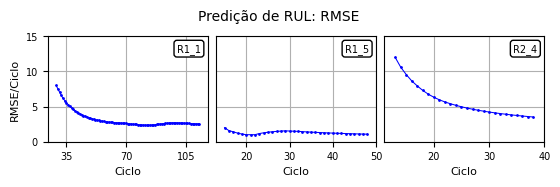

In [6]:
plot_multiple_RMSE(tedas[:],w=cm(14),h=cm(4.5),
                   title_check=False,bearings_id=bearings_id,out=out,
                   rect=[-0.015, -0.05, 1.02, 1.1]
                   )

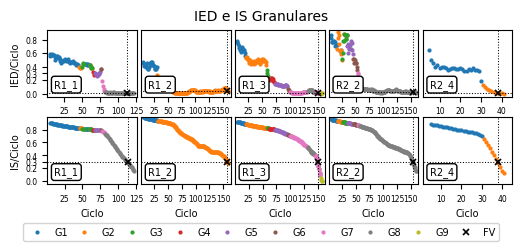

In [191]:

plot_multiple_HIandDSI(tedas,w=cm(13),h=cm(6),title_check=False,bearings_id=bearings_id,out=out,rect=[-0.02, 0.03, 1.02, 1.08],png=True,ftcks=5.5,flbl=7)

In [65]:
def plot_RUL_LIST2(tedas,name='Bearings2',title='Predição Granular de RUL',
                   bearings_id=None,w=cm(14), h=cm(12),
                   out=None,rect=[-0.15,0.035,1.02,1.02],png=True):

    nrow = len(tedas)
    # Se houver apenas um subplot, gridspec_kw pode causar um erro.
    # Removendo temporariamente o argumento para simplificar.
    # plt.subplots retorna um único objeto Axes se nrow=1.
    fig, axes = plt.subplots(nrow, 1, figsize=(w, h))

    # Converte 'axes' em um array 1D, se já não for.
    axes = np.ravel(axes)

    handles, labels=[],[]
    if bearings_id==None: bearings_id=[f'Bearing {i+1}' for i in range(nrow)]

    for i,teda in enumerate(tedas):
        if i==len(tedas)-1: xlabel=True
        else: xlabel=False
        handle, label = plot_RUL_ax2(axes[i], tedas[i],name=bearings_id[i],
                                    title=False,xlabel=xlabel)
        handles.append(handle)
        labels.append(label)

    id = max(enumerate(labels), key=lambda x: len(x[1]))[0]

    plt.suptitle(title, fontsize=10)
    if len(labels[id])< 8: ncol=len(labels[id])
    else: ncol=7

    fig.legend(handles[id], labels[id], loc='center right', bbox_to_anchor=(1.4, 0.6),
               ncol=2, fontsize=9, framealpha=0.85,
               columnspacing=0.5, handletextpad=0.5)
    
    plt.tight_layout(rect=rect)
    plt.subplots_adjust(hspace=0.35)

    if out is not None:
        ext = '.pdf' if png else '.eps'
        plt.savefig(out + name + '.pdf', dpi=500, transparent=True)

    plt.show()

C:\Users\claud\AppData\Local\Temp\ipykernel_33632\1589455505.py:35: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


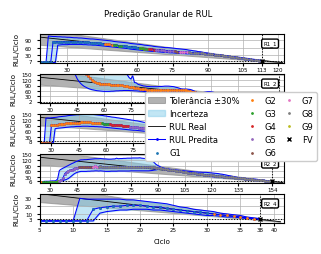

In [177]:
def plot_RUL_LIST2(tedas,name='Bearings2',title='Predição Granular de RUL',
                   bearings_id=None,w=cm(14), h=cm(12),
                   out=None,rect=[-0.15,0.035,1.02,1.02],png=True):

    nrow = len(tedas)
    # Se houver apenas um subplot, gridspec_kw pode causar um erro.
    # Removendo temporariamente o argumento para simplificar.
    # plt.subplots retorna um único objeto Axes se nrow=1.
    fig, axes = plt.subplots(nrow, 1, figsize=(w, h))

    # Converte 'axes' em um array 1D, se já não for.
    axes = np.ravel(axes)

    handles, labels=[],[]
    if bearings_id==None: bearings_id=[f'Bearing {i+1}' for i in range(nrow)]

    for i,teda in enumerate(tedas):
        if i==len(tedas)-1: xlabel=True
        else: xlabel=False
        handle, label = plot_RUL_ax2(axes[i], tedas[i],name=bearings_id[i],
                                    title=False,xlabel=xlabel)
        handles.append(handle)
        labels.append(label)

    id = max(enumerate(labels), key=lambda x: len(x[1]))[0]

    plt.suptitle(title, fontsize=6)
    if len(labels[id])< 8: ncol=len(labels[id])
    else: ncol=7

    fig.legend(handles[id], labels[id], loc='center right',
               ncol=3, fontsize=6, framealpha=1,
               columnspacing=0.5, handletextpad=0.5)
    
    plt.tight_layout(rect=rect)
    plt.subplots_adjust(hspace=0.35)

    if out is not None:
        ext = '.pdf' if png else '.eps'
        plt.savefig(out + name + '.pdf', dpi=500, transparent=True)
        plt.savefig(out + name + '.eps', dpi=500, transparent=True)

    plt.show()
def plot_RUL_ax2(ax,teda, startX=None, startY=None, endX=None, endY=None,
                anchor=None, out=None, name='Name',
                lw1=0.75, lw2=0.75, mk1=3.5, mk2=1, ftcks=4, flbl=5, fttl=7, flgnd=4,
                dotsize=1, loc=None, ncol=None, tol=30,
                title=True, xlabel=True, ylabel=True):

    if ncol is None:
        ncol = 2 if teda.gCreated > 4 else 1

    rulR = teda.rulR
    rulP = teda.rulP
    rulL = teda.rulL
    rulU = teda.rulU
    eolRUL = teda.rulP[int(teda.eolX - teda.nI)]
    x = teda.cycleP
    end = np.where(teda.cycleP == teda.eolX)[0][0] + 1

    size = int(teda.eolX/6)
    while size%5!=0:
        size=size+1

    # Organizando os dados por granulação
    activation = []
    for arr in teda.cloud_activation2[:end]:
        aux = np.array([None for _ in range(teda.gCreated + 1)])
        for k in range(len(arr)):
            aux[int(arr[k])] = int(arr[k])
        activation.append(aux)
    activation = np.array(activation).T
    qtd = len(activation) - 1

    names = [f'G{i + 1}' for i in range(qtd)]
    xr, yr = [[] for _ in range(qtd)], [[] for _ in range(qtd)]
    for i in range(qtd):
        gran = activation[i + 1]
        for l in range(len(gran)):
            if gran[l] == i + 1:
                yr[i].append(rulP[l])
                xr[i].append(x[l])

    # Limites dos eixos
    if endX is None:
        if len(x) >= 60: endX=x[-1]+0.5
        elif len(x) < 60: endX=x[-1]+0.5
    if startX is None:
        if len(x) >= 60: startX=x[-1]*0.15
        elif len(x) < 60: startX=x[0]
    if startY is None:
        if rulR[0] >= 90: startY=eolRUL - 10
        elif rulR[0] < 90: startY = eolRUL - 5
    if endY is None:
        endY = np.max(rulR)*1
    
    # Linhas principais
    ax.fill_between(x[:], (1 - tol / 100) * rulR[:], (1 + tol / 100) * rulR[:],
                    color='gray', alpha=0.6, label=f"Tolerância \u00B1{tol}%", linewidth=lw1)
    ax.fill_between(x[:end], rulL[:end], rulU[:end], color='skyblue', alpha=0.5, label="Incerteza",)
    ax.plot(x[:], rulR[:], linestyle='-', linewidth=lw1*0.8, color='black', label="RUL Real")
    ax.plot(x[:end], rulP[:end], linestyle='-', marker='o', markersize=dotsize, linewidth=lw1, color='blue', label="RUL Predita")
    ax.plot(x[:end], rulU[:end], linestyle='-', linewidth=lw1, color='blue')
    ax.plot(x[:end], rulL[:end], linestyle='-', linewidth=lw1, color='blue')
    ax.plot([teda.eolX, teda.eolX], [-1, np.max(teda.rulU*20) * 1.2], color='black', linestyle=':', linewidth=lw2)
    ax.plot([-200, 200], [eolRUL, eolRUL], color='black', linestyle=':', linewidth=lw2)

    for i in range(len(xr)):
        ax.plot(xr[i], yr[i], linestyle=' ', marker='o', markersize=dotsize, label=names[i])

    ax.plot(teda.eolX, eolRUL, marker='x', color='black', markersize=mk1,
            linestyle='', markeredgewidth=mk2, label='FV')

    # Ajustes visuais
    if len(teda.cycleP) >=80: xticks = [i * 15 for i in range(10)]
    if len(teda.cycleP) <80: xticks = [i * 5 for i in range(60)] 

    if teda.eolX not in xticks:
        xticks=xticks+[teda.eolX]


    if (teda.rulR[0]) >=80: 
        yticks = [i * 30 for i in range(1,20)]+[eolRUL]
        #endY=np.max(teda.rulU[0:])*1.3
    if (teda.rulR[0]) <80: 
        yticks = [i * 10 for i in range(1,20)]+[eolRUL]
        #endY=np.max(teda.rulU[0:])*1.3
    
        
    ax.set_xticks(sorted(xticks))
    ax.set_yticks(sorted(yticks))
    ax.set_xlim(startX, endX)
    ax.set_ylim(startY, endY)
    if xlabel: ax.set_xlabel("Ciclo", fontsize=flbl)
    if ylabel: ax.set_ylabel("RUL/Ciclo", fontsize=flbl)
    
    if title: ax.set_title(f'{name}', fontsize=fttl)
    else:
        ax.annotate(name,
            xy=(1, 1),                # canto superior direito
            xycoords='axes fraction',  # usa coordenadas normalizadas
            xytext=(-5, -5),         # desloca um pouco para dentro
            textcoords='offset points',
            fontsize=flgnd,
            color='black',
            ha='right', va='top',      # alinha o texto à direita e ao topo
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black', alpha=1))
    
    ax.tick_params(axis='both', labelsize=ftcks, colors='black')
    ax.xaxis.set_tick_params(pad=1) 
    ax.tick_params(axis='both', length=2)
    ax.grid(True, linewidth=0.5)
    handles, labels = ax.get_legend_handles_labels()
    return handles, labels

name = 'ISA_RUL2'
plot_RUL_LIST2(tedas[0:],w=cm(8),h=cm(6.25),out=out,name=name,bearings_id=bearings_id,png=True,rect=[-0.02,2,1.02,1.085])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


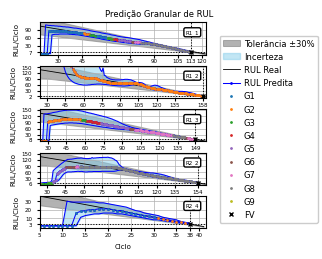

In [172]:
name = 'ISA_RUL2'
plot_RUL_LIST2(tedas[0:],w=cm(8),h=cm(6.25),out=out,name=name,bearings_id=bearings_id,png=True,rect=[-0.02,-0.055,0.7,1.085])